In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
file_folder = '/home/anna/annaCode/UiO/MEK4350/notebooks/Data_undervisning200923'
date_format = '%m/%d/%Y %H:%M:%S.%f'

df_list = []
for i in range(1,5):
    file_path =  os.path.join(file_folder, f"proberun{i}_tett.csv")
    df = pd.read_csv(file_path, names = ['date_string', 'probe_1_raw', 'probe_2_raw', 'probe_3_raw', 'probe_4_raw', 'sensors'])
    # convert data from string to datatime format
    df['date_time'] = pd.to_datetime(df['date_string'], format=date_format)
    # calculate elapsed time [in seconds] since  begining of the experiment
    df['elapsed_secs'] =  (df['date_time'] - df.at[0, 'date_time']).dt.total_seconds()
    #calculate amplitudes; raw columns oryginaly contain vertical distance from utrasound probe, covert it distance from water level 
    df['probe_1'] = df['probe_1_raw'].mean() - df['probe_1_raw']
    df['probe_2'] = df['probe_2_raw'].mean() - df['probe_2_raw']
    df['probe_3'] = df['probe_3_raw'].mean() - df['probe_3_raw']
    df['probe_4'] = df['probe_4_raw'].mean() - df['probe_4_raw']
    df_list.append(df)
    
df = df_list[0]
df.head(2)

,date_string,probe_1_raw,probe_2_raw,probe_3_raw,probe_4_raw,sensors,date_time,elapsed_secs,probe_1,probe_2,probe_3,probe_4
0,09/20/2023 08:42:24.832,0.10401,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.832,0.000,-0.000255,-0.000142,-0.000671,0.000152
1,09/20/2023 08:42:24.836,0.10410,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.836,0.004,-0.000345,-0.000142,-0.000671,0.000152


In [22]:
time_0_heights = np.empty(16)
j = 0
for _, df in enumerate (df_list):
    #print(df[f'probe_1_raw'].iloc[0])
    for i in range(1,4):
        #print(df[f'probe_{i}_raw'].iloc[0])
        time_0_heights[j] = df[f'probe_{i}_raw'].iloc[0]
        j += 1
time_0_heights

array([1.04010000e-001, 1.03580000e-001, 1.04440000e-001, 1.04110000e-001,
       1.03170000e-001, 1.04800000e-001, 1.04200000e-001, 1.03600000e-001,
       1.04800000e-001, 1.03330000e-001, 1.03160000e-001, 1.06510000e-001,
       2.05833592e-312, 2.29175545e-312, 2.07955588e-312, 2.14321575e-312])

In [26]:
time_0_heights

array([1.04010000e-001, 1.03580000e-001, 1.04440000e-001, 1.04110000e-001,
       1.03170000e-001, 1.04800000e-001, 1.04200000e-001, 1.03600000e-001,
       1.04800000e-001, 1.03330000e-001, 1.03160000e-001, 1.06510000e-001,
       2.05833592e-312, 2.29175545e-312, 2.07955588e-312, 2.14321575e-312])

In [23]:
mean_heights = np.empty(16)
j = 0
for _, df in enumerate (df_list):
    #print(df[f'probe_1_raw'].iloc[0])
    for i in range(1,4):
        print(df[f'probe_{i}_raw'].mean())
        mean_heights[j] = df[f'probe_{i}_raw'].mean()
        j += 1
mean_heights

0.10375521022221969
0.10343754399999998
0.10376929600000029
0.10387312663910726
0.10354402409209713
0.10385981997599668
0.10388744610871599
0.10353898617716012
0.10387448553269074
0.10447902204836425
0.10415093794452444
0.1043570345839264


array([1.03755210e-001, 1.03437544e-001, 1.03769296e-001, 1.03873127e-001,
       1.03544024e-001, 1.03859820e-001, 1.03887446e-001, 1.03538986e-001,
       1.03874486e-001, 1.04479022e-001, 1.04150938e-001, 1.04357035e-001,
       2.05833592e-312, 2.29175545e-312, 2.07955588e-312, 2.14321575e-312])

In [25]:
res = time_0_heights - mean_heights
res.min(), res.max()

(-0.0011490220483642427, 0.002152965416073599)

In [9]:
df = df_list[2]
df['probe_4_raw'].mean(), df['probe_4_raw'].iloc[0], df['probe_1_raw'].mean(), df['probe_1_raw'].iloc[0]

(0.10389702564558635, 0.10403, 0.10388744610871599, 0.1042)

In [6]:
 df['probe_3_raw'].mean(), df['probe_3_raw'].iloc[0]

(0.10376929600000029, 0.10444)

In [4]:
 df['probe_1_raw'].mean(), df['probe_1_raw'].iloc[0]

(0.10375521022221969, 0.10401)

In [3]:
# scale distances from laboratory setup to vertical axis of the plot
# y_asis_offset is the value on y axis corresponding to level 0 in probe 1, 
# the distances between wave paddle and ulatround probe plots on y axis correspond (are proprotional) to real distances in wave flume
# in addition to make the plot data more visible data_scale is added to plot, data_scale = 1 means all data (distances and amplitudes are proprotional)
real_distances = np.array([6.98, 8.155, 12.325, 16.995])
y_axis_offset = 0.88
scale_factor = y_axis_offset / real_distances[0]
scaled_distances = real_distances*scale_factor
y_axis_labels = [f'probe {i+1} - {real_distances[i]}' for i in range(4)]

In [4]:
def plot_experiment_data(experiment_number, data_scale, df):
    fig, ax = plt.subplots(figsize=(25, 5))
    colors = ['steelblue', 'cornflowerblue', 'midnightblue', 'black']

    for i in range(1,5):
        ax.plot(df.elapsed_secs.values, data_scale* df[f'probe_{i}'].values + scaled_distances[i-1],
              color = colors[i-1], linewidth=1, label =f'probe_{i}')

    ax.set_yticks(scaled_distances)
    ax.set_yticklabels(y_axis_labels)
    ax.grid()
    # Reverse order of datatags in the legend to make it easier to read
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = handles[::-1]; labels = labels[::-1]
    plt.xlabel('time since start of experiment[s]')
    plt.ylabel('Distance from wave paddle[m]')
    plt.legend(handles, labels, loc='lower right')
    plt.title(f'Experiment {experiment_number}')
    plt.show()

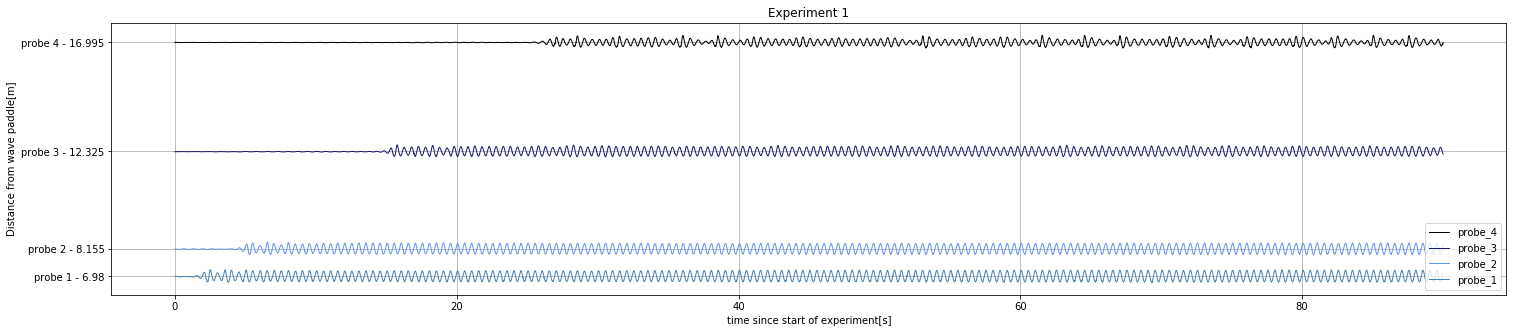

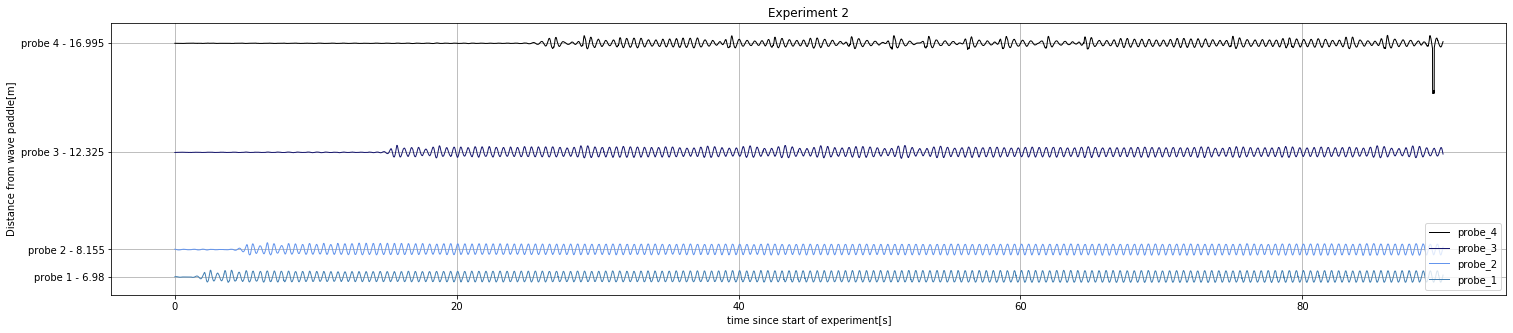

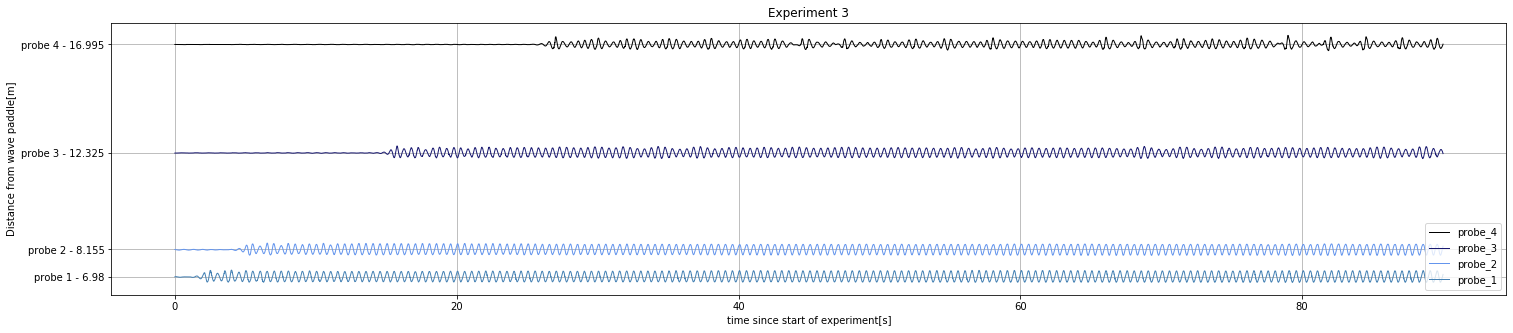

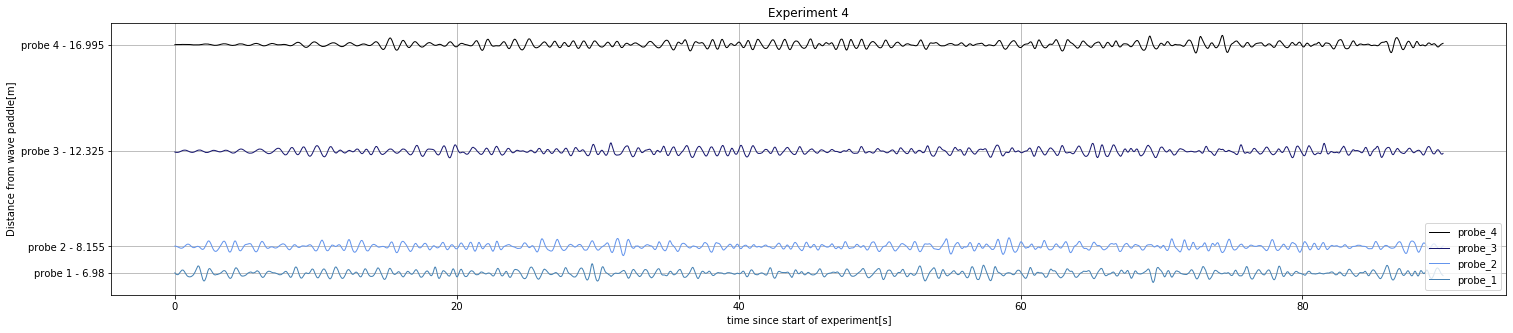

In [5]:
for i in range(0,4):
    plot_experiment_data(i+1, 2,  df_list[i])